# Proximal Policy Optimization (PPO): The Modern Standard

## 🎯 From Actor-Critic TD to PPO: The Evolution of Policy Gradient Methods

Welcome to **Proximal Policy Optimization (PPO)** - the algorithm that has dominated reinforcement learning since 2017 and remains the go-to method even in 2025. PPO represents the culmination of decades of research into stable, sample-efficient policy gradient methods.

## 📈 The Historical Journey: REINFORCE → Actor-Critic → TRPO → PPO

### The Problem with Vanilla Policy Gradients

From our previous notebooks, we've seen the progression:

1. **REINFORCE**: High variance, simple implementation
2. **Actor-Critic MC**: Reduced variance with baselines, but still episode-based
3. **Actor-Critic TD**: Bootstrapping for sample efficiency, but training instability

**The Core Challenge**: All these methods suffer from **destructive policy updates** - a single bad gradient step can destroy hours of learning progress.

### Trust Region Policy Optimization (TRPO): The Breakthrough

**TRPO (2015)** solved the destructive update problem with a brilliant insight:

**Core Idea**: Constrain policy updates to stay within a "trust region" where our gradient estimates are reliable.

**Mathematical Formulation**:
$$\max_\theta \mathbb{E}[L^{TRPO}(\theta)] \text{, subject to } \mathbb{E}[KL(\pi_{\theta_{old}}, \pi_\theta)] \leq \delta$$

Where:
- $L^{TRPO}(\theta)$ is the surrogate objective (importance sampling)
- $KL(\pi_{\theta_{old}}, \pi_\theta)$ is the KL divergence between old and new policies
- $\delta$ is the trust region constraint

**TRPO's Innovation**: 
- **Monotonic improvement**: Guaranteed to never make the policy worse
- **Stable learning**: Prevents destructive updates through KL constraint
- **Theoretical guarantees**: Provable convergence properties

**TRPO's Fatal Flaw**: 
- **Computational complexity**: Requires second-order optimization (natural gradients)
- **Difficult implementation**: Complex conjugate gradient and line search procedures
- **Slow**: Expensive computation per update step

### PPO: The Practical Solution

**PPO (2017)** achieved TRPO's benefits with a simple, efficient implementation:

**Key Insight**: Instead of constraining KL divergence, **clip the objective function** to prevent large updates.

**Why PPO Won**:
- **Simple implementation**: First-order optimization only
- **Computational efficiency**: Fast and scalable
- **Robust performance**: Works well across diverse environments
- **Stable learning**: Prevents destructive updates like TRPO
- **Sample efficiency**: Reuses data through multiple epochs

**PPO's Dominance (2017-2025)**:
- **OpenAI's choice**: Used for ChatGPT, GPT-4, and other large-scale RL applications
- **Industry standard**: Default choice for most RL practitioners
- **Research baseline**: Standard comparison algorithm in RL papers
- **Continued relevance**: Still the best general-purpose RL algorithm in 2025

## 🔧 PPO's Five Key Innovations

PPO builds upon Actor-Critic TD with five crucial improvements:

### 1. 🎯 Clipped Surrogate Objective

**Problem**: Standard policy gradients can make arbitrarily large updates, destroying learning progress.

**Solution**: Clip the importance sampling ratio to prevent extreme updates.

**Standard Policy Gradient**:
$$L^{PG}(\theta) = \mathbb{E}[\frac{\pi_\theta(a|s)}{\pi_{\theta_{old}}(a|s)} A(s,a)]$$

**PPO Clipped Objective**:
$$L^{CLIP}(\theta) = \mathbb{E}[\min(r_t(\theta) A_t, \text{clip}(r_t(\theta), 1-\epsilon, 1+\epsilon) A_t)]$$

Where:
- $r_t(\theta) = \frac{\pi_\theta(a_t|s_t)}{\pi_{\theta_{old}}(a_t|s_t)}$ is the probability ratio
- $\epsilon$ (typically 0.2) is the clipping parameter
- $A_t$ is the advantage estimate

**Intuition**: 
- If advantage is positive: prevent ratio from exceeding $1+\epsilon$
- If advantage is negative: prevent ratio from going below $1-\epsilon$
- **Result**: Conservative updates that preserve learning stability

### 2. 🎲 Generalized Advantage Estimation (GAE)

**Problem**: Actor-Critic TD still has high variance in advantage estimates.

**Solution**: Blend multiple n-step returns with exponential weighting.

**Standard N-Step Advantage**:
$$A_t^{(n)} = \sum_{k=0}^{n-1} \gamma^k r_{t+k+1} + \gamma^n V(s_{t+n}) - V(s_t)$$

**GAE Formula**:
$$A_t^{GAE(\lambda)} = \sum_{k=0}^{\infty} (\gamma \lambda)^k \delta_{t+k}$$

Where $\delta_t = r_{t+1} + \gamma V(s_{t+1}) - V(s_t)$ is the TD error.

**Effective Horizon Example**: With $\gamma = 0.99$ and $\lambda = 0.95$, the weights decay as $(\gamma \lambda)^k = 0.9405^k$. After ~15 steps, the weight drops to $0.9405^{15} \approx 0.1$, meaning GAE effectively considers about 15 future steps while theoretically extending to infinity.

**Benefits**:
- **Bias-variance tradeoff**: $\lambda=0$ (low variance, high bias) to $\lambda=1$ (high variance, low bias)
- **Flexible**: Can interpolate between TD and Monte Carlo methods
- **Efficient**: Exponential weighting reduces computational cost

### 3. 🌟 Entropy Bonus

**Problem**: Policies can converge prematurely to suboptimal solutions.

**Solution**: Add entropy regularization to encourage exploration.

**Total Objective**:
$$L^{TOTAL}(\theta) = L^{CLIP}(\theta) + c_1 L^{VF}(\theta) + c_2 S[\pi_\theta](s_t)$$

Where:
- $S[\pi_\theta](s_t) = -\sum_a \pi_\theta(a|s_t) \log \pi_\theta(a|s_t)$ is the entropy
- $c_2$ is the entropy coefficient (typically 0.01)

**Benefits**:
- **Exploration**: Prevents premature convergence to deterministic policies
- **Stability**: Maintains policy diversity throughout training
- **Adaptability**: Automatic annealing as learning progresses

### 4. 📚 Minibatch Epoch Updates

**Problem**: Actor-Critic TD uses each transition only once, wasting valuable data.

**Solution**: Reuse rollout data through multiple epochs with minibatch updates.

**Data Reuse Strategy**:
1. **Collect rollout**: Gather trajectories using current policy
2. **Multiple epochs**: Train on the same data for K epochs (typically 4-10)
3. **Minibatch updates**: Split data into minibatches for efficient GPU utilization
4. **Prevent overfitting**: Clipping and KL penalties prevent over-optimization

**GPU Efficiency Advantage**: Unlike previous notebooks that process entire episodes at once, PPO's minibatch approach is **GPU-friendly** - smaller batches fit better in GPU memory and enable parallel processing across multiple samples simultaneously.

**Benefits**:
- **Sample efficiency**: Better utilization of expensive environment interactions
- **Computational efficiency**: Amortizes rollout cost over multiple updates
- **Stable learning**: Minibatch updates provide more stable gradients
- **Hardware optimization**: GPU parallelization across minibatch samples

### 5. ✂️ Clipped Value Function Loss

**Problem**: Value function updates can also be destructive and unstable.

**Solution**: Clip value function updates similar to policy updates.

**Standard Value Loss**:
$$L^{VF}(\theta) = (V_\theta(s_t) - V_t^{target})^2$$

**PPO Clipped Value Loss**:
$$L^{VF}(\theta) = \max\left((V_\theta(s_t) - V_t^{target})^2, (\text{clip}(V_\theta(s_t), V_{old} - \epsilon_v, V_{old} + \epsilon_v) - V_t^{target})^2\right)$$

**Why max() and not min()? A Conservative Approach to Clipping**

The maximum operation ensures we **never underestimate the true prediction error** when clipping occurs. Here's the detailed reasoning:

**Case 1: Clipping doesn't constrain the update**
- If $V_{old} - \epsilon_v < V_\theta(s_t) < V_{old} + \epsilon_v$, then clipping has no effect
- The clipped value equals the unclipped value: $\text{clip}(V_\theta(s_t), ...) = V_\theta(s_t)$
- Both loss terms are identical: $\max(\text{same}, \text{same}) = \text{same}$
- Result: Normal, unclipped loss computation

**Case 2: Clipping constrains the update (the critical case)**
- The new value prediction $V_\theta(s_t)$ would move too far from $V_{old}$
- Clipping forces: $V_{clipped} = V_{old} \pm \epsilon_v$ (boundary value)
- Now we have two different loss values to choose from:
  - **Unclipped loss**: $(V_\theta(s_t) - V_t^{target})^2$ (true error)
  - **Clipped loss**: $(V_{clipped} - V_t^{target})^2$ (constrained error)

**The Conservative Principle**: We take the **maximum** (larger) of these two losses because:

1. **Prevent Loss Hiding**: If clipping makes the prediction artificially closer to the target, we don't want to hide this by using the smaller loss
2. **Maintain Learning Signal**: The larger loss preserves the magnitude of the error signal for gradient computation
3. **Avoid Underfitting**: Using min() would encourage the optimizer to prefer clipped updates even when they're less accurate
4. **Consistency Check**: Only allow clipping if it doesn't make the loss artificially small

**Example Scenario**:
- Target return: $V_t^{target} = 100$
- Old value: $V_{old} = 50$
- New prediction: $V_\theta(s_t) = 90$ (moving toward target)
- Clipping bound: $\epsilon_v = 10$
- Clipped value: $V_{clipped} = \min(90, 50 + 10) = 60$

Loss comparison:
- Unclipped loss: $(90 - 100)^2 = 100$
- Clipped loss: $(60 - 100)^2 = 1600$

Using max(): We choose 1600 (the larger loss) because the clipped value is actually **further** from the target. This prevents the clipping from artificially reducing the loss signal.

**Benefits**:
- **Stable value learning**: Prevents large value function updates
- **Conservative clipping**: Only clips when it doesn't hide true error
- **Consistent with policy clipping**: Unified approach to stability
- **Empirical improvement**: Better performance in practice

### 6. 📊 KL Divergence Monitoring (Not Constraining)

**Key Distinction**: Unlike TRPO, PPO doesn't use KL divergence as a **constraint** - it uses it as a **diagnostic tool**.

**What is KL Divergence?**
The Kullback-Leibler divergence measures how much one probability distribution differs from another:

$$KL(\pi_{\theta_{old}}, \pi_\theta) = \mathbb{E}_{s \sim \rho} \mathbb{E}_{a \sim \pi_{\theta_{old}}} \left[ \log \frac{\pi_{\theta_{old}}(a|s)}{\pi_\theta(a|s)} \right]$$

**Intuitive Meaning**:
- **KL = 0**: New policy is identical to old policy
- **KL > 0**: New policy differs from old policy
- **Higher KL**: Larger policy changes

**Why Monitor KL in PPO?**

1. **Training Health Check**: KL divergence tells us how much the policy is changing each update
   - **Healthy range**: 0.001 - 0.01 (modest, stable changes)
   - **Too low**: < 0.0001 (learning stagnation)
   - **Too high**: > 0.1 (potentially destructive updates)

2. **Clipping Effectiveness**: KL helps validate that clipping is working
   - If KL is very high despite clipping, something is wrong
   - If KL is very low, we might be too conservative

3. **Hyperparameter Tuning**: KL guides learning rate and clipping parameter adjustment
   - High KL → reduce learning rate or decrease clip epsilon
   - Low KL → increase learning rate or increase clip epsilon

4. **Early Stopping**: Some implementations use KL divergence for early stopping
   - If KL exceeds a threshold, stop training on current batch
   - Prevents over-optimization on stale data

**PPO's Approach vs TRPO's Approach**:

| Aspect | TRPO | PPO |
|--------|------|-----|
| **KL Usage** | Hard constraint | Diagnostic monitoring |
| **Optimization** | Constrained optimization | Unconstrained with clipping |
| **Computational Cost** | Expensive (second-order) | Cheap (first-order) |
| **Implementation** | Complex conjugate gradient | Simple gradient descent |
| **Robustness** | Sensitive to KL threshold | Robust to hyperparameters |

**Real-World Example**:
In our implementation, you might see:
- **Early training**: KL ≈ 0.01 (policy learning quickly)
- **Mid training**: KL ≈ 0.005 (policy refining)
- **Late training**: KL ≈ 0.001 (policy converging)

**Benefits of KL Monitoring**:
- **Debugging**: Identifies training instabilities early
- **Validation**: Confirms clipping is preventing destructive updates
- **Optimization**: Guides hyperparameter tuning
- **Research**: Enables comparison with TRPO and other methods
- **Zero overhead**: Computed during normal forward pass

**The Bottom Line**: PPO gets TRPO's stability benefits through clipping, but keeps KL monitoring as a "health check" - giving us the best of both worlds with minimal computational overhead.

## 🚀 Why PPO Dominates (2017-2025)

### ✅ PPO's Advantages

1. **Simplicity**: Easy to implement and understand
2. **Stability**: Robust across diverse environments and hyperparameters
3. **Sample Efficiency**: Reuses data effectively through multiple epochs
4. **Computational Efficiency**: First-order optimization, GPU-friendly
5. **Generality**: Works well for both discrete and continuous control
6. **Theoretical Grounding**: Builds on solid policy gradient theory
7. **Empirical Success**: Proven track record in complex domains

### 🏆 PPO's Real-World Impact

**OpenAI's Applications**:
- **ChatGPT**: RLHF (Reinforcement Learning from Human Feedback) training
- **GPT-4**: Large-scale language model alignment
- **OpenAI Five**: Dota 2 championship-level performance
- **Robotics**: Real-world robot control and manipulation

**Industry Adoption**:
- **Default choice**: Most RL practitioners start with PPO
- **Production systems**: Widely used in recommendation systems, game AI, autonomous vehicles
- **Research standard**: Baseline comparison in academic papers

### 📊 PPO vs Alternatives (2025 Perspective)

**PPO vs SAC (Soft Actor-Critic)**:
- **PPO**: Better for discrete actions, more stable, simpler
- **SAC**: Better for continuous control, more sample efficient, more complex

**PPO vs TD3 (Twin Delayed Deep Deterministic)**:
- **PPO**: General-purpose, works with discrete actions
- **TD3**: Continuous control only, more sample efficient in some domains

**PPO vs Modern Methods**:
- **PPO still competitive**: Remains state-of-the-art for many applications
- **Simplicity advantage**: Easier to tune and debug than newer methods
- **Proven reliability**: Extensive empirical validation across domains

## 🔄 PPO Algorithm Overview

**Algorithm: Proximal Policy Optimization (PPO)**

---
**Input:** 
- Actor-Critic network with parameters $\theta$
- Rollout length $T$
- Minibatch size $M$
- Number of epochs $K$
- Clipping parameter $\epsilon$
- GAE parameter $\lambda$
- Learning rate $\alpha$

**Output:** 
- Trained policy parameters $\theta$

---
**Procedure:**
1. **Initialize** network parameters $\theta$
2. **For** iteration $i = 1, 2, ...$ **do:**
3. &nbsp;&nbsp;&nbsp;&nbsp;**Collect rollout** of length $T$ using policy $\pi_\theta$
4. &nbsp;&nbsp;&nbsp;&nbsp;**Compute advantages** using GAE with parameter $\lambda$
5. &nbsp;&nbsp;&nbsp;&nbsp;**For** epoch $e = 1, 2, ..., K$ **do:**
6. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**For** each minibatch $B$ of size $M$ **do:**
7. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Compute** clipped surrogate objective $L^{CLIP}$
8. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Compute** clipped value function loss $L^{VF}$
9. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Compute** entropy bonus $S[\pi_\theta]$
10. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Monitor** KL divergence $KL(\pi_{\theta_{old}}, \pi_\theta)$ (diagnostic only)
11. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Total loss**: $L = L^{CLIP} + c_1 L^{VF} + c_2 S[\pi_\theta]$
12. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Update** $\theta$ using gradient ascent
13. &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**End For**
14. &nbsp;&nbsp;&nbsp;&nbsp;**End For**
15. **End For**

---

## 🎓 Learning Objectives

By the end of this notebook, you will understand:

1. **Historical Context**: The evolution from REINFORCE to PPO
2. **Clipped Surrogate Objective**: How to prevent destructive policy updates
3. **Generalized Advantage Estimation**: Advanced variance reduction techniques
4. **Entropy Regularization**: Maintaining exploration throughout training
5. **Minibatch Training**: Efficient data reuse strategies
6. **KL Divergence Monitoring**: Diagnosing training health without constraints
7. **Implementation Details**: Building a production-ready PPO agent

## 🔥 PPO's Continued Relevance (2025)

Even in 2025, PPO remains the **dominant reinforcement learning algorithm** because:

1. **Reliability**: Consistently good performance across domains
2. **Simplicity**: Easy to implement, tune, and debug
3. **Scalability**: Works from toy problems to large-scale applications
4. **Community**: Extensive documentation, tutorials, and support
5. **Proven Track Record**: Success in high-stakes applications like ChatGPT

**The Bottom Line**: PPO strikes the perfect balance between performance, stability, and simplicity - making it the algorithm of choice for practitioners worldwide.

Let's dive into the implementation and see why PPO has maintained its dominance for nearly a decade!

In [1]:
import numpy as np
import torch
import torch.optim as optim
from collections import deque
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

# Import our RL utilities including the ActorCriticNetwork
from rl_utils import (
    set_seeds,
    ActorCriticNetwork,
    create_env_with_wrappers,
    plot_training_results,
    plot_variance_analysis,
)
from rl_utils.visualization import (
    get_moving_average,
    plot_ppo_training_results,
    plot_ppo_variance_analysis,
)

# Create configuration
CONFIG = {
    "seed": 42,
    "episodes": 1000,
    "gamma": 0.99,
    "lr": 3e-4,
    "device": "cuda",
    "window_length": 100,
    "target_score": 200,  # LunarLander-v3 target score
    # Environment: LunarLander-v3 only
    "env_id": "LunarLander-v3",
    "env_kwargs": {
        "gravity": -10.0,
        "enable_wind": False,
        "wind_power": 15.0,
        "turbulence_power": 1.5,
    },
    # Video Recording Config
    "record_videos": True,
    "video_folder": "videos",
    "num_videos": 9,  # Number of videos to record during training
    "record_test_videos": True,
    # Neural Network Config
    "network": {
        "fc_out_features": [64, 64],  # Shared features
        "actor_features": [64],  # Actor-specific layers after shared
        "critic_features": [64],  # Critic-specific layers after shared
        "activation": "SiLU",
        "use_layer_norm": True,
        "dropout_rate": 0.0,  # No dropout for stability
    },
    # PPO-Specific Parameters
    "rollout_length": 2048,  # Steps per rollout
    "minibatch_size": 64,    # Minibatch size for updates
    "epochs": 10,            # Training epochs per rollout
    "clip_epsilon": 0.2,     # Clipping parameter
    "value_clip_epsilon": 0.2,  # Value function clipping
    "critic_loss_coeff": 0.5,   # Weight for critic loss
    "entropy_coeff": 0.01,      # Weight for entropy bonus
    "gae_lambda": 0.95,         # GAE parameter
    "max_grad_norm": 0.5,       # Maximum gradient norm for clipping
}

set_seeds(CONFIG["seed"])
print(f"🎲 Global random seeds set to {CONFIG['seed']} for reproducible results")
print(
    f"📝 Environment episodes will use seeds {CONFIG['seed']} + episode_number for varied but reproducible episodes"
)

🎲 Global random seeds set to 42 for reproducible results
📝 Environment episodes will use seeds 42 + episode_number for varied but reproducible episodes


In [2]:
class PPOAgent:
    """Proximal Policy Optimization agent with all key innovations."""

    def __init__(self, network, config):
        """
        Initialize PPO agent.

        Args:
            network: ActorCriticNetwork instance
            config: Configuration dictionary
        """
        self.network = network.to(config["device"])
        self.device = config["device"]
        self.gamma = config["gamma"]
        self.rollout_length = config["rollout_length"]
        self.minibatch_size = config["minibatch_size"]
        self.epochs = config["epochs"]
        self.clip_epsilon = config["clip_epsilon"]
        self.value_clip_epsilon = config["value_clip_epsilon"]
        self.critic_loss_coeff = config["critic_loss_coeff"]
        self.entropy_coeff = config["entropy_coeff"]
        self.gae_lambda = config["gae_lambda"]
        self.max_grad_norm = config["max_grad_norm"]
        self.window_size = config.get("window_length")

        # Single optimizer for all network parameters
        self.optimizer = optim.Adam(
            self.network.parameters(),
            lr=config["lr"],
        )

        # Print detailed network information
        print(f"📊 PPO NETWORK DETAILS:")
        self.network.print_network_info()
        print(f"🎯 Rollout Length: {self.rollout_length}")
        print(f"📦 Minibatch Size: {self.minibatch_size}")
        print(f"🔁 Training Epochs: {self.epochs}")
        print(f"✂️ Clip Epsilon: {self.clip_epsilon}")
        print(f"🌟 Entropy Coefficient: {self.entropy_coeff}")
        print(f"🎲 GAE Lambda: {self.gae_lambda}")
        print(f"🎓 Learning Rate: {config['lr']}")
        print(f"✂️ Max Gradient Norm: {self.max_grad_norm}")
        print(f"⚖️ Critic Loss Coefficient: {self.critic_loss_coeff}")

        # Rollout buffer storage
        self.reset_rollout_buffer()

        # Variance and performance tracking
        self.gradient_norms = []
        self.episode_returns = []
        self.return_variance_history = []

        # Update step tracking
        self.update_step = 0
        self.update_steps_history = []

        # Loss component tracking
        self.loss_history = {
            "actor_loss": [],
            "critic_loss": [],
            "entropy_loss": [],
            "total_loss": [],
        }

        # PPO-specific tracking
        self.rollout_count = 0
        self.steps_collected = 0
        self.policy_updates = 0
        self.clip_fraction_history = []
        self.kl_divergence_history = []

    def reset_rollout_buffer(self):
        """Reset rollout buffer for new collection."""
        self.states = []
        self.actions = []
        self.rewards = []
        self.log_probs = []
        self.values = []
        self.dones = []
        self.advantages = []
        self.returns = []
        self.current_episode_return = 0.0
        self.episode_step_count = 0

    def select_action(self, state):
        """Select an action and store necessary data."""
        state = torch.as_tensor(state, dtype=torch.float32, device=self.device)

        with torch.no_grad():
            # Get policy distribution and value estimate
            dist, value = self.network(state)
            action = dist.sample()

            # Store log probability and value prediction
            if self.network.is_continuous:
                log_prob = dist.log_prob(action).sum(-1)
                action_to_env = self.network.clip_action(action).flatten()
            else:
                log_prob = dist.log_prob(action)
                action_to_env = action.item()

        # Store in rollout buffer
        self.states.append(state)
        self.actions.append(action)
        self.log_probs.append(log_prob)
        self.values.append(value)

        self.steps_collected += 1
        self.episode_step_count += 1

        return action_to_env

    def store_transition(self, reward, done):
        """Store reward and done flag."""
        self.rewards.append(reward)
        self.dones.append(done)
        self.current_episode_return += reward

        # If episode ended, store episode return
        if done:
            self.episode_returns.append(self.current_episode_return)
            self.current_episode_return = 0.0
            self.episode_step_count = 0

    def is_rollout_complete(self):
        """Check if rollout is complete."""
        return len(self.states) >= self.rollout_length

    def compute_gae_advantages(self, next_value=0.0):
        """Compute Generalized Advantage Estimation."""
        # Convert to tensors
        rewards = torch.tensor(self.rewards, dtype=torch.float32, device=self.device)
        values = torch.stack(self.values)
        dones = torch.tensor(self.dones, dtype=torch.float32, device=self.device)  # Convert to float

        # Compute advantages using GAE
        advantages = []
        gae = 0.0
        
        # Work backwards through the episode
        for t in reversed(range(len(rewards))):
            if t == len(rewards) - 1:
                # Last step - use next_value from environment or 0 if terminal
                next_value_t = next_value if not self.dones[t] else 0.0
            else:
                next_value_t = values[t + 1]
            
            # TD error
            delta = rewards[t] + self.gamma * next_value_t * (1 - dones[t]) - values[t]
            
            # GAE calculation
            gae = delta + self.gamma * self.gae_lambda * (1 - dones[t]) * gae
            advantages.insert(0, gae)

        advantages = torch.tensor(advantages, dtype=torch.float32, device=self.device)
        returns = advantages + values.detach()

        return advantages, returns

    def update_policy(self, next_state=None):
        """Update policy using PPO algorithm."""
        if len(self.states) < self.minibatch_size:
            return {"actor_loss": 0.0, "critic_loss": 0.0, "entropy_loss": 0.0, "total_loss": 0.0}, 0.0

        self.rollout_count += 1

        # Get next state value for GAE calculation
        if next_state is not None:
            next_state_tensor = torch.as_tensor(next_state, dtype=torch.float32, device=self.device)
            with torch.no_grad():
                _, next_value = self.network(next_state_tensor)
                next_value = next_value.item()
        else:
            next_value = 0.0

        # Compute advantages and returns using GAE
        advantages, returns = self.compute_gae_advantages(next_value)

        # Track return variance
        if len(self.episode_returns) >= self.window_size:
            recent_returns = self.episode_returns[-self.window_size:]
            return_variance = np.var(recent_returns)
            self.return_variance_history.append(return_variance)

        # Convert rollout data to tensors
        states = torch.stack(self.states)
        actions = torch.stack(self.actions)
        old_log_probs = torch.stack(self.log_probs)
        old_values = torch.stack(self.values)

        # Normalize advantages
        advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)

        # Store for reuse across epochs
        rollout_data = {
            'states': states,
            'actions': actions,
            'old_log_probs': old_log_probs,
            'old_values': old_values,
            'advantages': advantages,
            'returns': returns,
        }

        # Train for multiple epochs
        total_actor_loss = 0.0
        total_critic_loss = 0.0
        total_entropy_loss = 0.0
        total_loss = 0.0
        total_grad_norm = 0.0
        clip_fraction = 0.0
        kl_divergence = 0.0
        num_updates = 0

        for epoch in range(self.epochs):
            # Shuffle data for each epoch
            indices = torch.randperm(len(states))
            
            for start_idx in range(0, len(states), self.minibatch_size):
                end_idx = min(start_idx + self.minibatch_size, len(states))
                batch_indices = indices[start_idx:end_idx]
                
                if len(batch_indices) < self.minibatch_size // 2:  # Skip very small batches
                    continue

                # Extract minibatch
                batch_states = states[batch_indices]
                batch_actions = actions[batch_indices]
                batch_old_log_probs = old_log_probs[batch_indices]
                batch_old_values = old_values[batch_indices]
                batch_advantages = advantages[batch_indices]
                batch_returns = returns[batch_indices]

                # Forward pass
                dist, values = self.network(batch_states)
                
                # Compute new log probabilities
                if self.network.is_continuous:
                    new_log_probs = dist.log_prob(batch_actions).sum(-1)
                else:
                    new_log_probs = dist.log_prob(batch_actions)

                # Compute probability ratio
                ratio = torch.exp(new_log_probs - batch_old_log_probs)

                # Clipped surrogate objective
                surr1 = ratio * batch_advantages
                surr2 = torch.clamp(ratio, 1 - self.clip_epsilon, 1 + self.clip_epsilon) * batch_advantages
                actor_loss = -torch.min(surr1, surr2).mean()

                # Clipped value function loss
                value_pred_clipped = batch_old_values + torch.clamp(
                    values - batch_old_values, -self.value_clip_epsilon, self.value_clip_epsilon
                )
                value_loss_1 = (values - batch_returns).pow(2)
                value_loss_2 = (value_pred_clipped - batch_returns).pow(2)
                critic_loss = 0.5 * torch.max(value_loss_1, value_loss_2).mean()

                # critic loss calculation without clipping. try this.
                # critic_loss = 0.5 * (values - batch_returns).pow(2).mean()  

                # Entropy bonus
                entropy = dist.entropy()
                if entropy.dim() > 1:
                    entropy = entropy.sum(-1)
                entropy_loss = -entropy.mean()

                # Total loss
                total_loss_batch = actor_loss + self.critic_loss_coeff * critic_loss + self.entropy_coeff * entropy_loss

                # Update network
                self.optimizer.zero_grad()
                total_loss_batch.backward()

                # Record gradient norm BEFORE clipping
                grad_norm = 0.0
                for param in self.network.parameters():
                    if param.grad is not None:
                        param_norm = param.grad.data.norm(2)
                        grad_norm += param_norm.item() ** 2
                grad_norm = grad_norm ** 0.5

                # Apply gradient clipping
                torch.nn.utils.clip_grad_norm_(self.network.parameters(), self.max_grad_norm)

                self.optimizer.step()

                # Accumulate statistics
                total_actor_loss += actor_loss.item()
                total_critic_loss += critic_loss.item()
                total_entropy_loss += entropy_loss.item()
                total_loss += total_loss_batch.item()
                total_grad_norm += grad_norm
                
                # Track clipping and KL divergence
                with torch.no_grad():
                    clipped = torch.abs(ratio - 1.0) > self.clip_epsilon
                    clip_fraction += clipped.float().mean().item()
                    kl_divergence += (batch_old_log_probs - new_log_probs).mean().item()

                num_updates += 1

        # Average statistics
        if num_updates > 0:
            avg_actor_loss = total_actor_loss / num_updates
            avg_critic_loss = total_critic_loss / num_updates
            avg_entropy_loss = total_entropy_loss / num_updates
            avg_total_loss = total_loss / num_updates
            avg_grad_norm = total_grad_norm / num_updates
            avg_clip_fraction = clip_fraction / num_updates
            avg_kl_divergence = kl_divergence / num_updates
        else:
            avg_actor_loss = avg_critic_loss = avg_entropy_loss = avg_total_loss = avg_grad_norm = 0.0
            avg_clip_fraction = avg_kl_divergence = 0.0

        # Store statistics
        self.update_step += 1
        self.policy_updates += num_updates
        self.gradient_norms.append(avg_grad_norm)
        self.loss_history["actor_loss"].append(avg_actor_loss)
        self.loss_history["critic_loss"].append(avg_critic_loss)
        self.loss_history["entropy_loss"].append(avg_entropy_loss)
        self.loss_history["total_loss"].append(avg_total_loss)
        self.update_steps_history.append(self.update_step)
        self.clip_fraction_history.append(avg_clip_fraction)
        self.kl_divergence_history.append(avg_kl_divergence)

        # Reset rollout buffer
        self.reset_rollout_buffer()

        return {
            "actor_loss": avg_actor_loss,
            "critic_loss": avg_critic_loss,
            "entropy_loss": avg_entropy_loss,
            "total_loss": avg_total_loss,
        }, avg_grad_norm

    def get_variance_stats(self):
        """Get variance statistics for analysis."""
        if len(self.episode_returns) < 2:
            return {
                "gradient_norm_mean": 0.0,
                "gradient_norm_std": 0.0,
                "return_mean": 0.0,
                "return_std": 0.0,
                "recent_return_variance": 0.0,
                "clip_fraction_mean": 0.0,
                "kl_divergence_mean": 0.0,
            }

        return {
            "gradient_norm_mean": np.mean(self.gradient_norms),
            "gradient_norm_std": np.std(self.gradient_norms),
            "return_mean": np.mean(self.episode_returns),
            "return_std": np.std(self.episode_returns),
            "recent_return_variance": (
                self.return_variance_history[-1]
                if self.return_variance_history
                else 0.0
            ),
            "clip_fraction_mean": np.mean(self.clip_fraction_history) if self.clip_fraction_history else 0.0,
            "kl_divergence_mean": np.mean(self.kl_divergence_history) if self.kl_divergence_history else 0.0,
        }

    def get_ppo_stats(self):
        """Get PPO-specific statistics."""
        return {
            "rollout_count": self.rollout_count,
            "steps_collected": self.steps_collected,
            "policy_updates": self.policy_updates,
            "updates_per_rollout": self.policy_updates / max(1, self.rollout_count),
            "steps_per_update": self.steps_collected / max(1, self.policy_updates),
        }

In [3]:
def train_ppo(is_continuous, config):
    """Main training loop for the PPO agent."""
    action_type = "Continuous" if is_continuous else "Discrete"
    print(f"\n{'='*70}")
    print(f"PROXIMAL POLICY OPTIMIZATION (PPO) - {action_type.upper()}")
    print(f"{'='*70}")
    
    # Calculate video recording interval
    video_record_interval = max(1, config["episodes"] // config["num_videos"])
    print(f"📹 Recording {config['num_videos']} videos every {video_record_interval} episodes")
    
    # Create algorithm-specific video folder
    video_folder = f"videos/PPO_{action_type.lower()}"
    config_with_videos = config.copy()
    config_with_videos["video_folder"] = video_folder
    config_with_videos["video_record_interval"] = video_record_interval
    
    # Create Environment
    env = create_env_with_wrappers(
        config_with_videos, 
        is_continuous, 
        record_videos=True, 
        video_prefix=f"ppo_{action_type.lower()}",
        cleanup_existing=True
    )
    
    # Get observation dimension and space
    dummy_obs, _ = env.reset()
    observation_dim = len(dummy_obs)
    
    # Create Actor-Critic Network and Agent
    print(f"\n🏗️ CREATING {action_type.upper()} ACTOR-CRITIC NETWORK:")
    network = ActorCriticNetwork(
        observation_dim=observation_dim,
        action_space=env.action_space,
        is_continuous=is_continuous,
        network_config=config["network"]
    )
    
    print(f"\n🤖 INITIALIZING {action_type.upper()} PPO AGENT:")
    agent = PPOAgent(network, config)
    
    # Training Loop
    scores = []
    scores_window = deque(maxlen=config["window_length"])
    start_time = time.time()
    
    print(f"\n🚀 STARTING {action_type.upper()} PPO TRAINING...")
    
    # Initialize environment
    state, _ = env.reset(seed=config["seed"])
    episode_count = 0
    
    # Use tqdm for progress tracking
    pbar = tqdm(total=config["episodes"], desc="Training", unit="episode")
    
    while episode_count < config["episodes"]:
        # Collect rollout
        while not agent.is_rollout_complete():
            action = agent.select_action(state)
            
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            
            agent.store_transition(reward, done)
            
            state = next_state
            
            if done:
                # Episode finished
                episode_count += 1
                episode_reward = agent.episode_returns[-1] if agent.episode_returns else 0.0
                scores.append(episode_reward)
                scores_window.append(episode_reward)
                
                # Reset environment
                state, _ = env.reset(seed=config["seed"] + episode_count)
                
                # Update progress bar
                avg_score_window = np.mean(scores_window) if len(scores_window) > 0 else 0.0
                
                # Get latest loss values and metrics
                actor_loss = agent.loss_history["actor_loss"][-1] if agent.loss_history["actor_loss"] else 0.0
                critic_loss = agent.loss_history["critic_loss"][-1] if agent.loss_history["critic_loss"] else 0.0
                entropy_loss = agent.loss_history["entropy_loss"][-1] if agent.loss_history["entropy_loss"] else 0.0
                total_loss = agent.loss_history["total_loss"][-1] if agent.loss_history["total_loss"] else 0.0
                grad_norm = agent.gradient_norms[-1] if agent.gradient_norms else 0.0
                
                # Get PPO-specific metrics
                clip_fraction = agent.clip_fraction_history[-1] if agent.clip_fraction_history else 0.0
                kl_divergence = agent.kl_divergence_history[-1] if agent.kl_divergence_history else 0.0
                
                pbar.set_description(
                    f"Ep {episode_count:4d} | "
                    f"Score: {episode_reward:6.1f} | "
                    f"Avg({config['window_length']}): {avg_score_window:6.1f} | "
                    f"Rollouts: {agent.rollout_count:3d} | "
                    f"Updates: {agent.policy_updates:4d} | "
                    f"ActorLoss: {actor_loss:7.4f} | "
                    f"CriticLoss: {critic_loss:7.4f} | "
                    f"EntLoss: {entropy_loss:7.4f} | "
                    f"TotalLoss: {total_loss:7.4f} | "
                    f"GradNorm: {grad_norm:6.4f} | "
                    f"ClipFrac: {clip_fraction:5.3f} | "
                    f"KL: {kl_divergence:7.4f}"
                )
                pbar.update(1)
                
                # Handle video display
                if episode_count % video_record_interval == 0 and config["record_videos"]:
                    from rl_utils.environment import display_latest_video
                    pbar.write(f"\nVideo recorded at episode {episode_count}")
                    display_latest_video(
                        config_with_videos["video_folder"], 
                        f"ppo_{action_type.lower()}", 
                        episode_count
                    )
                
                # Stop if we've reached the target number of episodes
                if episode_count >= config["episodes"]:
                    break
        
        # Update policy when rollout is complete
        if agent.is_rollout_complete():
            loss_dict, grad_norm = agent.update_policy(state)
            
            # Update progress information with latest metrics
            avg_score_window = np.mean(scores_window) if len(scores_window) > 0 else 0.0
            actor_loss = loss_dict.get('actor_loss', 0.0)
            critic_loss = loss_dict.get('critic_loss', 0.0)
            entropy_loss = loss_dict.get('entropy_loss', 0.0)
            total_loss = loss_dict.get('total_loss', 0.0)
            
            # Get PPO-specific stats
            variance_stats = agent.get_variance_stats()
            clip_fraction = variance_stats.get('clip_fraction_mean', 0.0)
            kl_divergence = variance_stats.get('kl_divergence_mean', 0.0)
            
            pbar.set_description(
                f"Ep {episode_count:4d} | "
                f"Score: {scores[-1] if scores else 0.0:6.1f} | "
                f"Avg({config['window_length']}): {avg_score_window:6.1f} | "
                f"Rollouts: {agent.rollout_count:3d} | "
                f"Updates: {agent.policy_updates:4d} | "
                f"ActorLoss: {actor_loss:7.4f} | "
                f"CriticLoss: {critic_loss:7.4f} | "
                f"EntLoss: {entropy_loss:7.4f} | "
                f"TotalLoss: {total_loss:7.4f} | "
                f"GradNorm: {grad_norm:6.4f} | "
                f"ClipFrac: {clip_fraction:5.3f} | "
                f"KL: {kl_divergence:7.4f}"
            )
    
    pbar.close()
    env.close()
    
    elapsed_time = time.time() - start_time
    final_window_size = min(config["window_length"], len(scores))
    final_performance = np.mean(scores[-final_window_size:]) if final_window_size > 0 else 0.0
    
    # Print PPO-specific statistics
    ppo_stats = agent.get_ppo_stats()
    print(f"\n{action_type} PPO training completed in {elapsed_time:.1f} seconds!")
    print(f"Final performance: {final_performance:.2f} (last {final_window_size} episodes)")
    print(f"Total rollouts: {ppo_stats['rollout_count']}")
    print(f"Total policy updates: {ppo_stats['policy_updates']}")
    print(f"Steps collected: {ppo_stats['steps_collected']}")
    print(f"Updates per rollout: {ppo_stats['updates_per_rollout']:.1f}")
    print(f"Steps per update: {ppo_stats['steps_per_update']:.1f}")
    
    return scores, agent.loss_history, agent

In [4]:
# --- DISCRETE ACTION SPACE: PPO ---
print("Starting PPO training with DISCRETE actions...")

discrete_ppo_scores, discrete_ppo_losses, discrete_ppo_agent = train_ppo(
    is_continuous=False, 
    config=CONFIG
)


📹 Displaying 9 training videos (episodes: [110, 221, 332, 443, 554, 665, 776, 887, 998]):


📹 9 training videos available in videos/PPO_discrete


Ep 1000 | Score:  281.3 | Avg(100):  162.4 | Rollouts: 172 | Updates: 55040 | ActorLoss: -0.0072 | CriticLoss: 29.9742 | EntLoss: -0.7097 | TotalLoss: 14.9728 | GradNorm: 33.6068 | ClipFrac: 0.060 | KL:  0.0068: 100%|██████████| 1000/1000 [28:40<00:00,  1.72s/episode]


Discrete PPO training completed in 1720.5 seconds!
Final performance: 162.37 (last 100 episodes)
Total rollouts: 172
Total policy updates: 55040
Steps collected: 354019
Updates per rollout: 320.0
Steps per update: 6.4


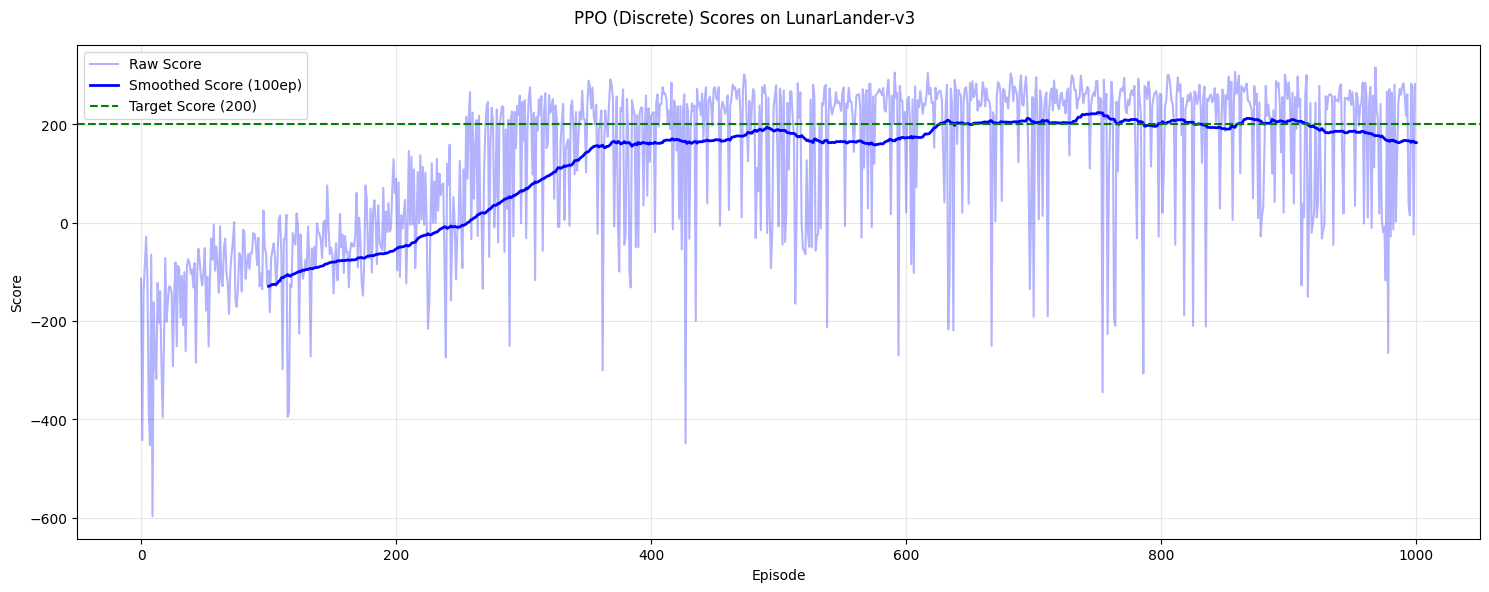

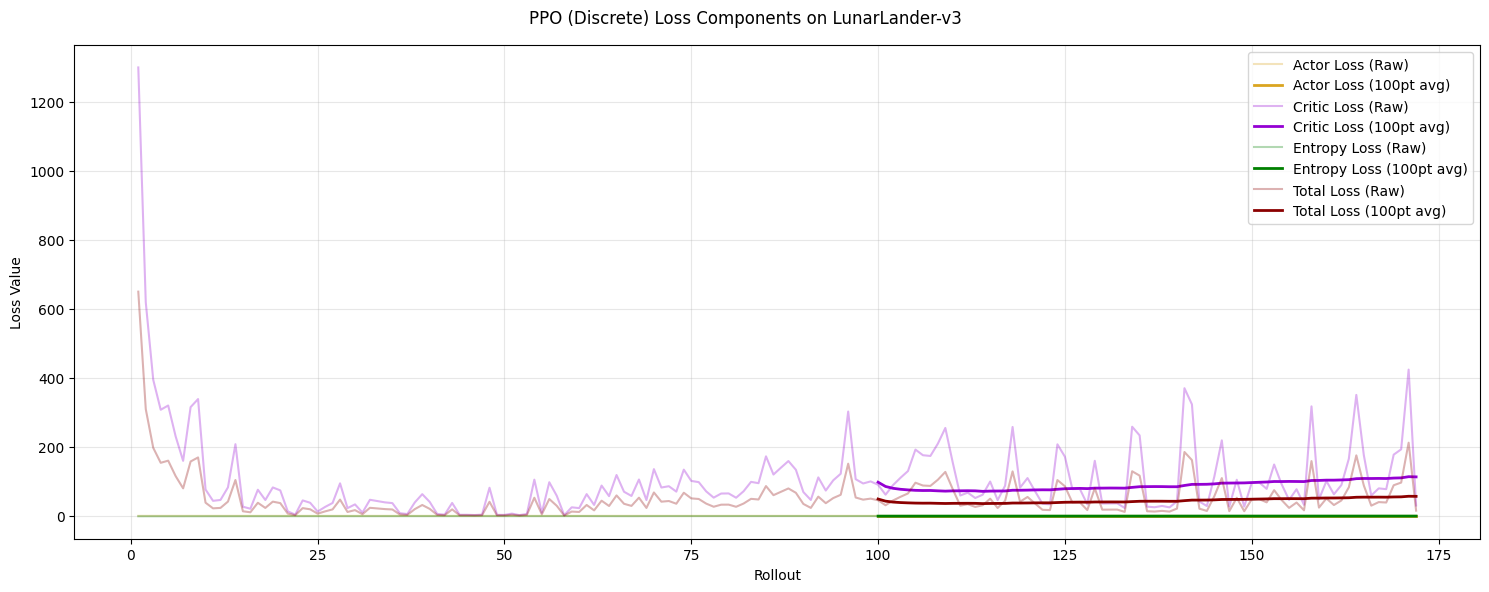

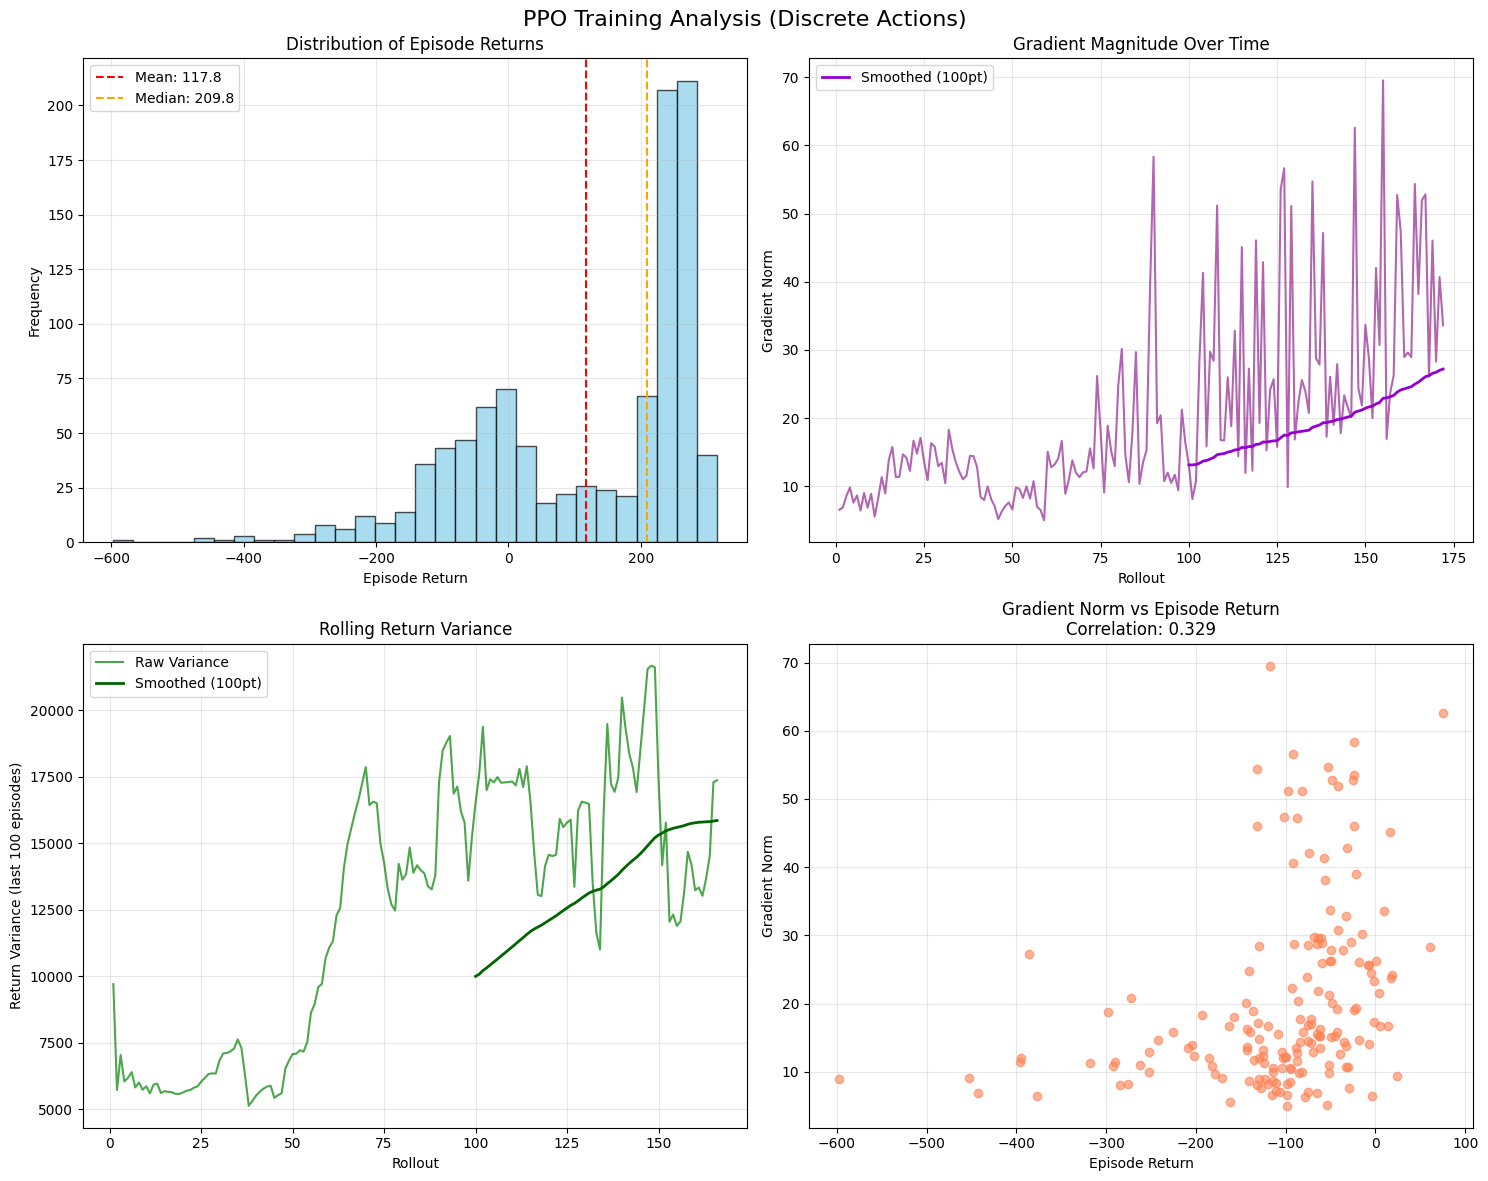


--- PPO Training Statistics (Discrete) ---
Episode Returns: μ=117.82, σ=164.80
Gradient Norms: μ=20.4080, σ=13.6594
Recent Return Variance: 17368.57
Coefficient of Variation (Returns): 1.40
Total Rollouts: 172
Total Policy Updates: 55040

🔍 DISCRETE PPO ANALYSIS:
Clip fraction: 0.118 (target: ~0.2)
KL divergence: 0.0119
Data efficiency: 6.4 env steps per policy update

✅ DISCRETE PPO TRAINING COMPLETED!
Final average score (last 100 episodes): 162.37
Network parameters: 13,893
Total rollouts: 172
Total policy updates: 55040


In [5]:
# Plot results for discrete PPO
plot_ppo_training_results(
    discrete_ppo_scores, 
    discrete_ppo_agent.loss_history, 
    CONFIG, 
    "Discrete", 
    algorithm_name="PPO"
)

# Show variance analysis
plot_ppo_variance_analysis(
    discrete_ppo_agent, 
    discrete_ppo_scores, 
    "Discrete", 
    CONFIG, 
    algorithm_name="PPO"
)

# PPO-specific analysis
variance_stats = discrete_ppo_agent.get_variance_stats()
ppo_stats = discrete_ppo_agent.get_ppo_stats()

print(f"\n🔍 DISCRETE PPO ANALYSIS:")
print(f"Clip fraction: {variance_stats['clip_fraction_mean']:.3f} (target: ~{CONFIG['clip_epsilon']:.1f})")
print(f"KL divergence: {variance_stats['kl_divergence_mean']:.4f}")
print(f"Data efficiency: {ppo_stats['steps_per_update']:.1f} env steps per policy update")

# Training completion message
final_window_size = min(CONFIG["window_length"], len(discrete_ppo_scores))
final_avg = np.mean(discrete_ppo_scores[-final_window_size:]) if final_window_size > 0 else 0.0
print(f"\n✅ DISCRETE PPO TRAINING COMPLETED!")
print(f"Final average score (last {final_window_size} episodes): {final_avg:.2f}")
print(f"Network parameters: {discrete_ppo_agent.network.get_param_count():,}")
print(f"Total rollouts: {ppo_stats['rollout_count']}")
print(f"Total policy updates: {ppo_stats['policy_updates']}")

In [6]:
# --- CONTINUOUS ACTION SPACE: PPO ---
print("Starting PPO training with CONTINUOUS actions...")

continuous_ppo_scores, continuous_ppo_losses, continuous_ppo_agent = train_ppo(
    is_continuous=True, 
    config=CONFIG
)


📹 Displaying 9 training videos (episodes: [110, 221, 332, 443, 554, 665, 776, 887, 998]):


📹 9 training videos available in videos/PPO_continuous


Ep 1000 | Score:  241.1 | Avg(100):   97.3 | Rollouts: 373 | Updates: 119360 | ActorLoss: -0.0082 | CriticLoss:  9.1900 | EntLoss: -2.6225 | TotalLoss:  4.5605 | GradNorm: 3.4416 | ClipFrac: 0.066 | KL:  0.0049: 100%|██████████| 1000/1000 [1:01:57<00:00,  3.72s/episode]


Continuous PPO training completed in 3717.2 seconds!
Final performance: 97.27 (last 100 episodes)
Total rollouts: 373
Total policy updates: 119360
Steps collected: 765743
Updates per rollout: 320.0
Steps per update: 6.4


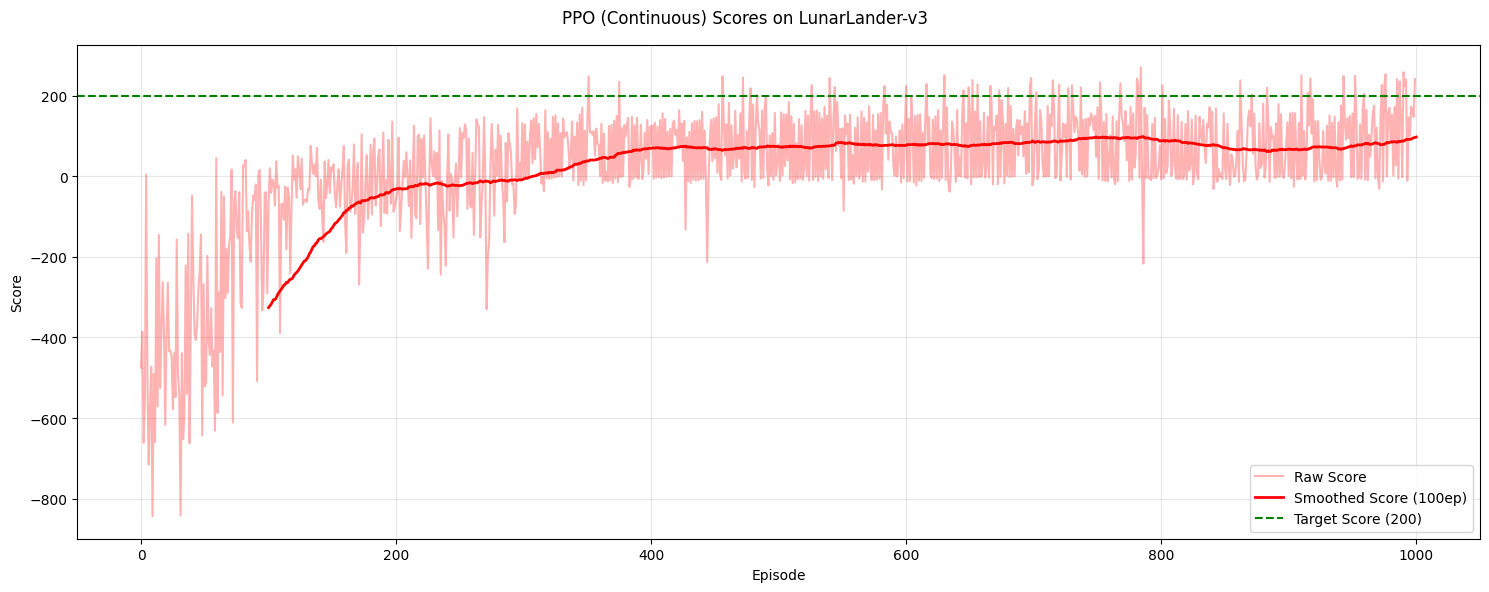

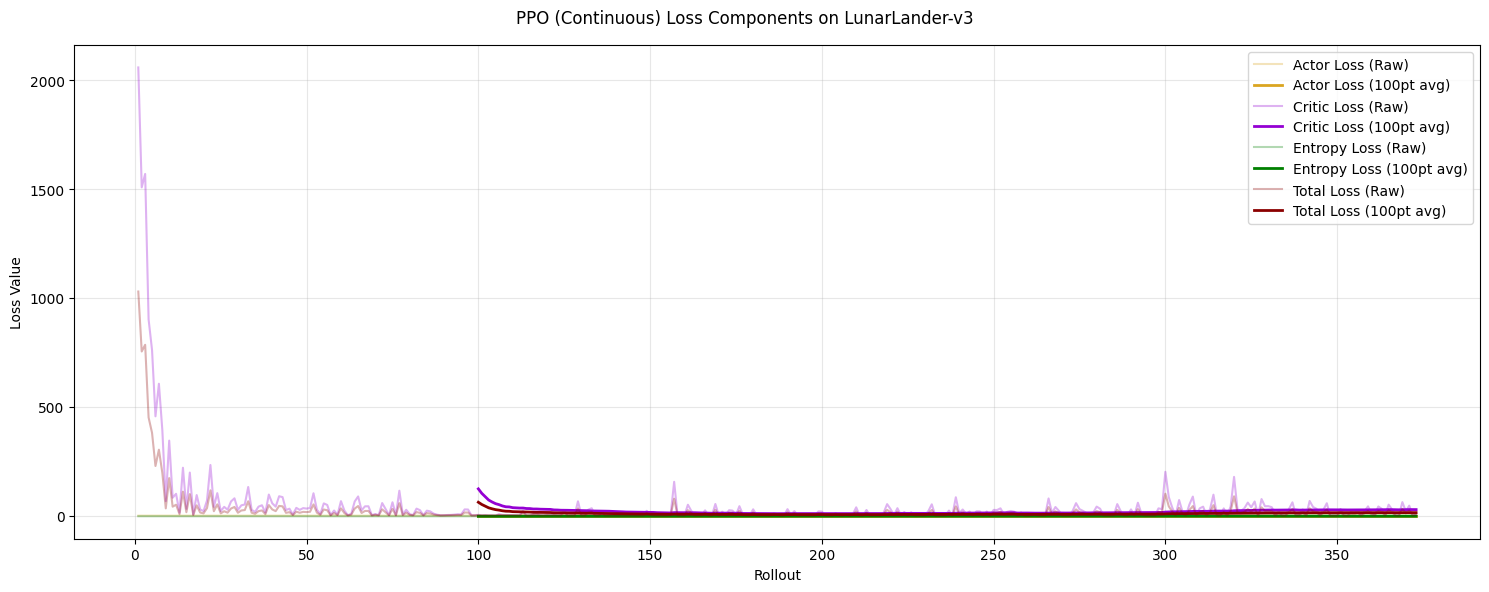

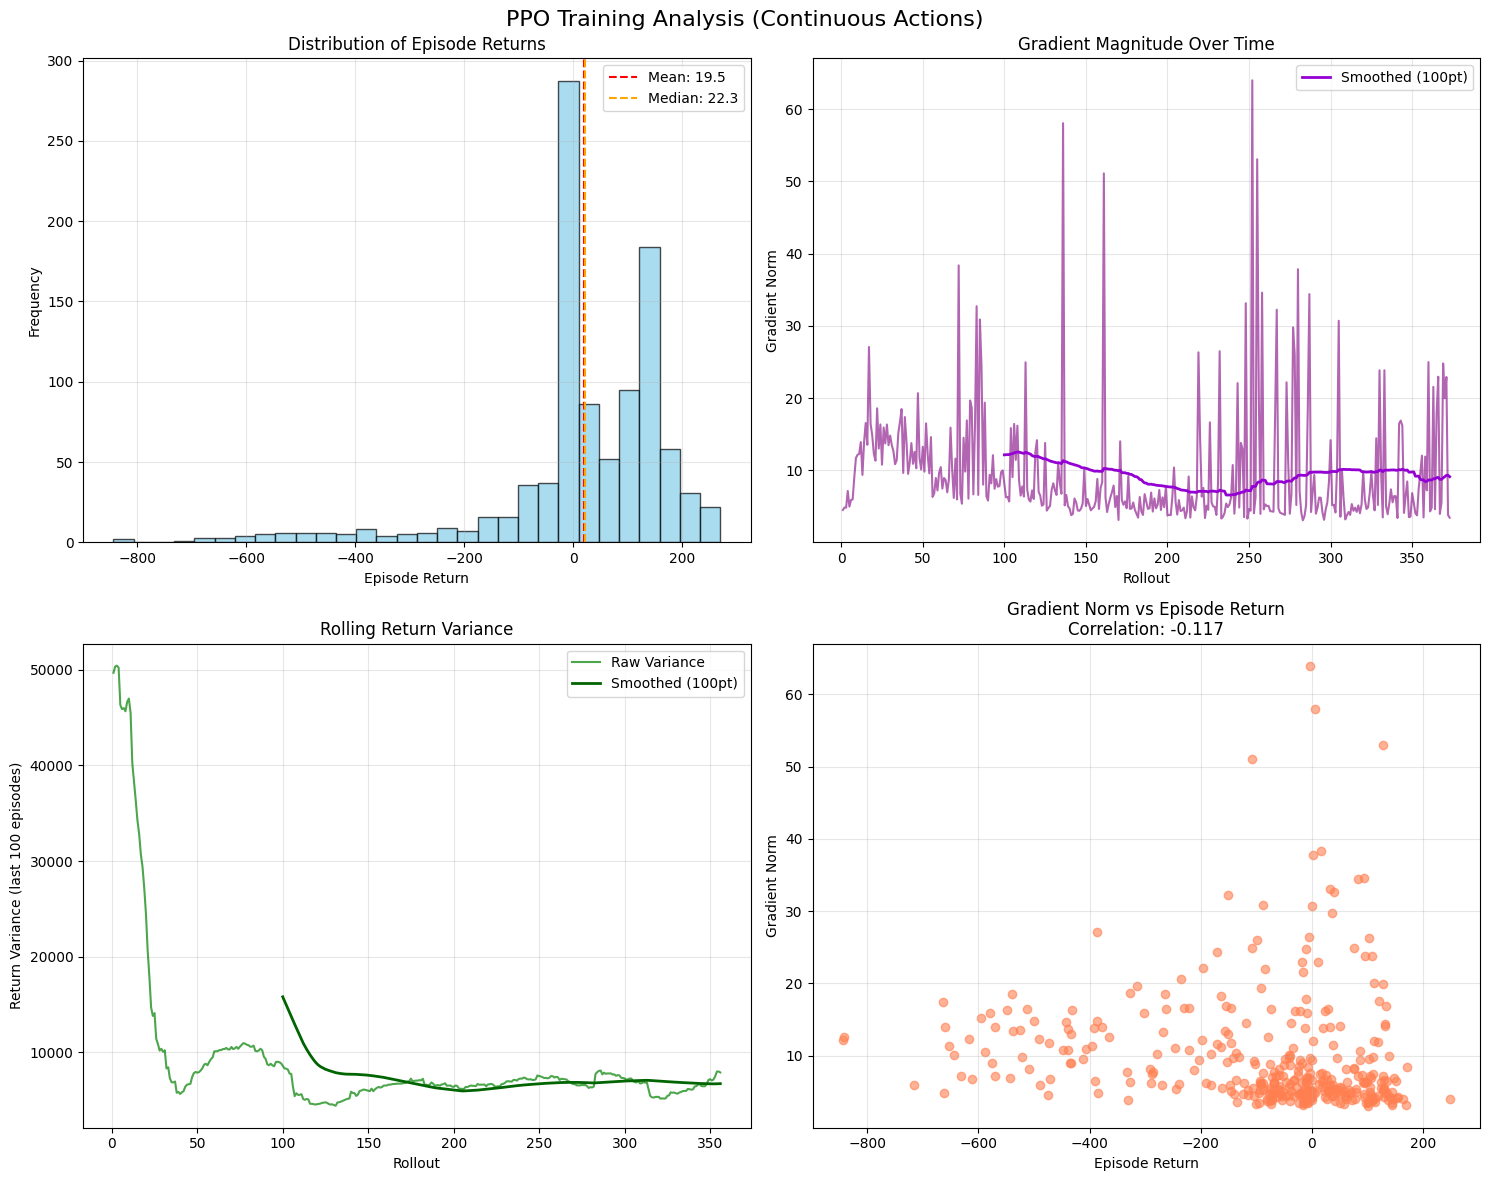


--- PPO Training Statistics (Continuous) ---
Episode Returns: μ=19.54, σ=161.60
Gradient Norms: μ=9.6585, σ=8.1869
Recent Return Variance: 7910.49
Coefficient of Variation (Returns): 8.27
Total Rollouts: 373
Total Policy Updates: 119360

🔍 CONTINUOUS PPO ANALYSIS:
Clip fraction: 0.090 (target: ~0.2)
KL divergence: 0.0080
Data efficiency: 6.4 env steps per policy update

✅ CONTINUOUS PPO TRAINING COMPLETED!
Final average score (last 100 episodes): 97.27
Network parameters: 13,765
Total rollouts: 373
Total policy updates: 119360


In [7]:
# Plot results for continuous PPO
plot_ppo_training_results(
    continuous_ppo_scores, 
    continuous_ppo_agent.loss_history, 
    CONFIG, 
    "Continuous", 
    algorithm_name="PPO"
)

# Show variance analysis
plot_ppo_variance_analysis(
    continuous_ppo_agent, 
    continuous_ppo_scores, 
    "Continuous", 
    CONFIG, 
    algorithm_name="PPO"
)

# PPO-specific analysis
variance_stats = continuous_ppo_agent.get_variance_stats()
ppo_stats = continuous_ppo_agent.get_ppo_stats()

print(f"\n🔍 CONTINUOUS PPO ANALYSIS:")
print(f"Clip fraction: {variance_stats['clip_fraction_mean']:.3f} (target: ~{CONFIG['clip_epsilon']:.1f})")
print(f"KL divergence: {variance_stats['kl_divergence_mean']:.4f}")
print(f"Data efficiency: {ppo_stats['steps_per_update']:.1f} env steps per policy update")

# Training completion message
final_window_size = min(CONFIG["window_length"], len(continuous_ppo_scores))
final_avg = np.mean(continuous_ppo_scores[-final_window_size:]) if final_window_size > 0 else 0.0
print(f"\n✅ CONTINUOUS PPO TRAINING COMPLETED!")
print(f"Final average score (last {final_window_size} episodes): {final_avg:.2f}")
print(f"Network parameters: {continuous_ppo_agent.network.get_param_count():,}")
print(f"Total rollouts: {ppo_stats['rollout_count']}")
print(f"Total policy updates: {ppo_stats['policy_updates']}")

In [8]:
# entropy coeff: 0.05
# self.action_log_std = nn.Parameter(torch.zeros(1, action_dim))


COMPREHENSIVE ANALYSIS: PPO Performance and Efficiency

📊 PPO PERFORMANCE COMPARISON:
Method               Final Score  Rollouts   Updates    Efficiency     
---------------------------------------------------------------------------
Discrete PPO         162.4        172        55040      6.4            
Continuous PPO       97.3         373        119360     6.4            


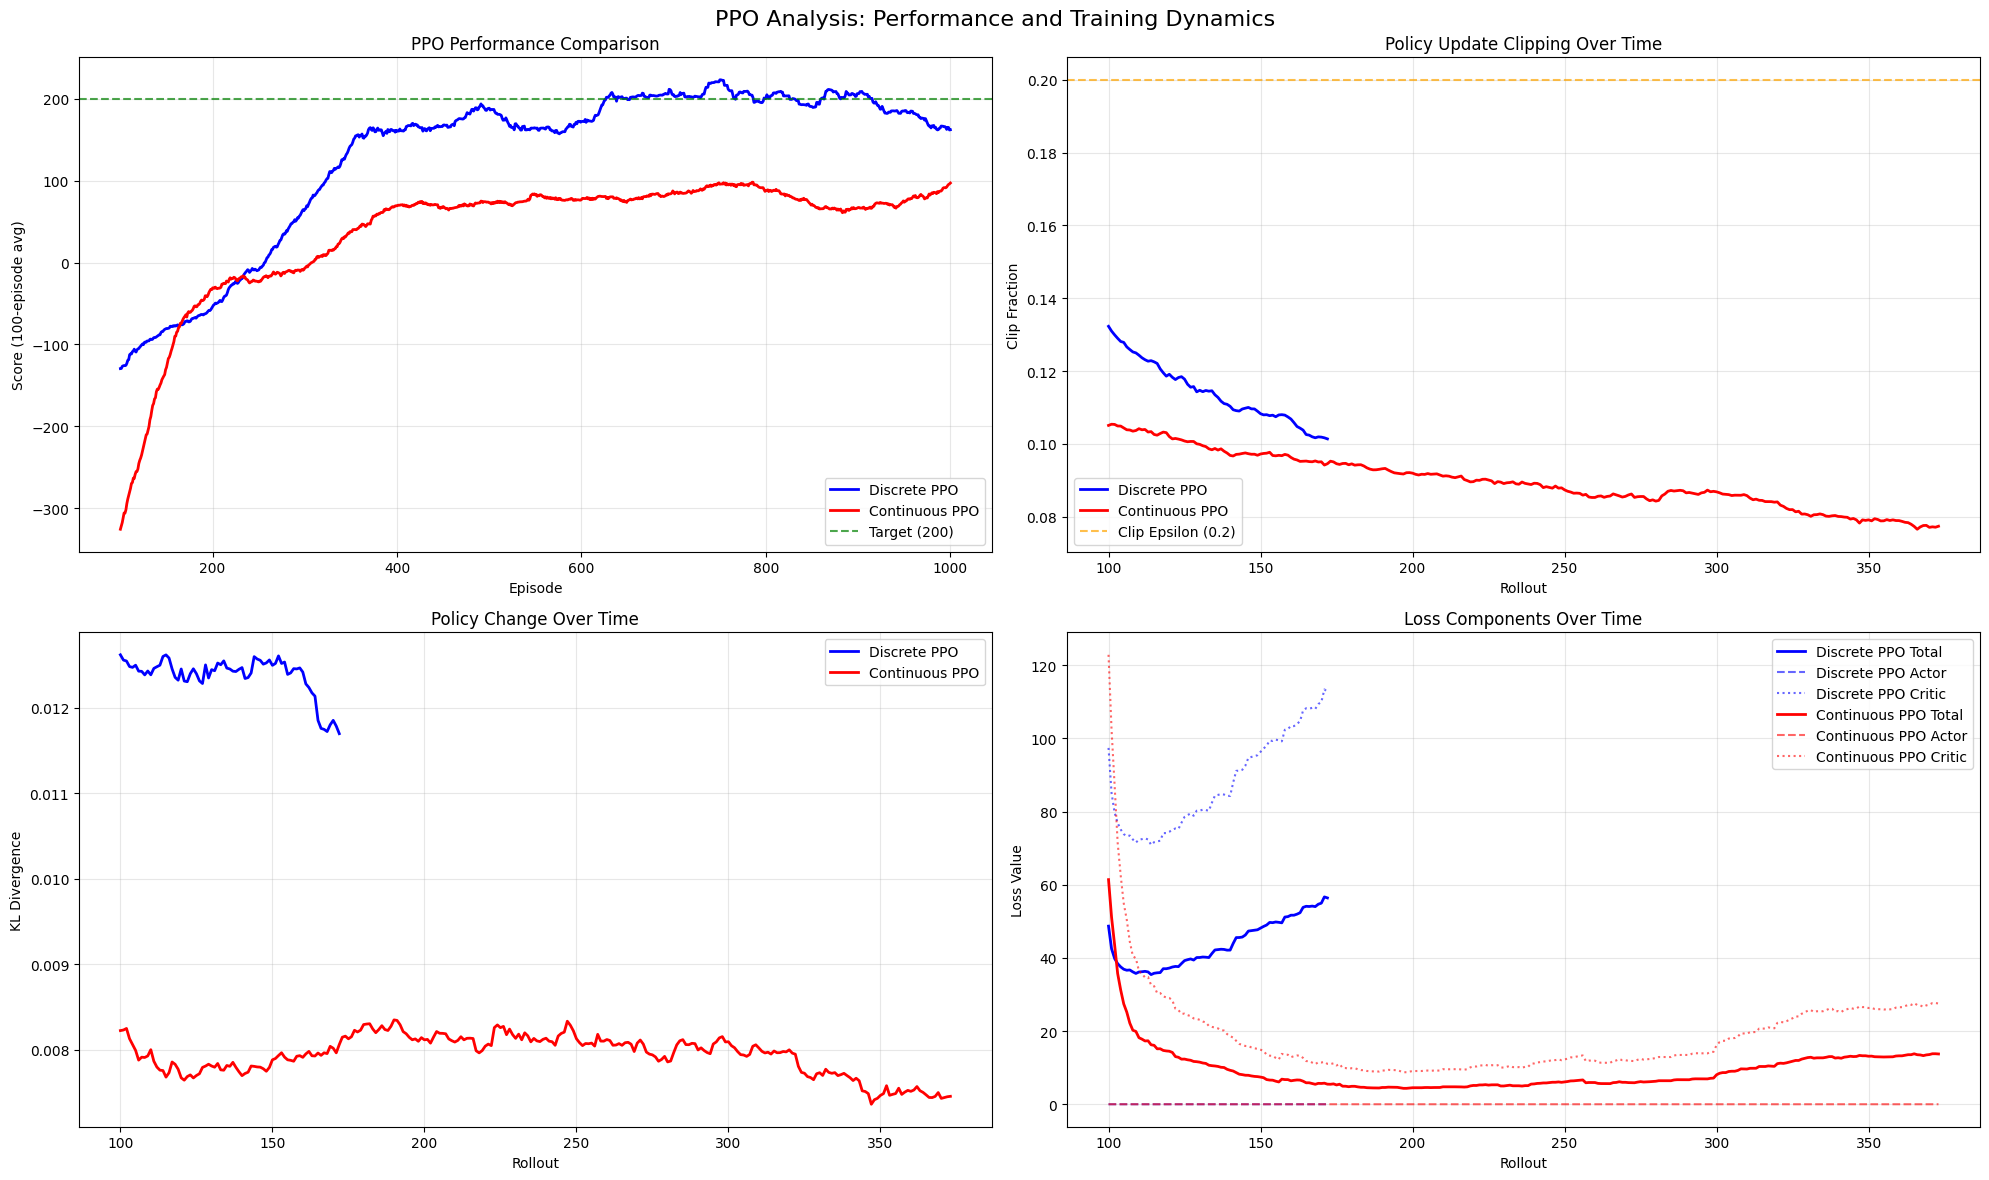


🔍 PPO EFFICIENCY ANALYSIS:
PPO's key advantage: Data reuse through multiple epochs
- Each rollout is trained on 10 times
- Minibatch size: 64 (enables GPU efficiency)
- Rollout length: 2048 (balances sample efficiency and memory)

📈 PPO STABILITY INDICATORS:
Discrete PPO:
  Clip fraction: 0.118 (healthy: ~0.1-0.3)
  KL divergence: 0.0119 (healthy: <0.01)
  Return variance: 17368.57
Continuous PPO:
  Clip fraction: 0.090 (healthy: ~0.1-0.3)
  KL divergence: 0.0080 (healthy: <0.01)
  Return variance: 7910.49


In [9]:
# --- COMPREHENSIVE ANALYSIS: PPO Performance ---
import matplotlib.pyplot as plt
from rl_utils.visualization import get_moving_average

print(f"\n{'='*80}")
print(f"COMPREHENSIVE ANALYSIS: PPO Performance and Efficiency")
print(f"{'='*80}")

# PPO-specific comparison
experiments = [
    ("Discrete PPO", discrete_ppo_scores, discrete_ppo_agent),
    ("Continuous PPO", continuous_ppo_scores, continuous_ppo_agent),
]

print(f"\n📊 PPO PERFORMANCE COMPARISON:")
print(f"{'Method':<20} {'Final Score':<12} {'Rollouts':<10} {'Updates':<10} {'Efficiency':<15}")
print("-" * 75)

for name, scores, agent in experiments:
    final_window_size = min(CONFIG["window_length"], len(scores))
    final_avg = np.mean(scores[-final_window_size:]) if final_window_size > 0 else 0.0
    ppo_stats = agent.get_ppo_stats()
    variance_stats = agent.get_variance_stats()
    
    print(f"{name:<20} {final_avg:<12.1f} {ppo_stats['rollout_count']:<10} {ppo_stats['policy_updates']:<10} {ppo_stats['steps_per_update']:<15.1f}")

# Create PPO-specific analysis plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('PPO Analysis: Performance and Training Dynamics', fontsize=16)

colors = ['blue', 'red']
smoothing_window = CONFIG["window_length"]

# 1. Performance comparison (episodes)
for i, (name, scores, agent) in enumerate(experiments):
    if len(scores) >= smoothing_window:
        smoothed, offset = get_moving_average(scores, window=smoothing_window)
        episodes = range(offset + 1, offset + 1 + len(smoothed))
        ax1.plot(episodes, smoothed, label=name, color=colors[i], linewidth=2)

ax1.axhline(y=CONFIG["target_score"], color='g', linestyle='--', label=f'Target ({CONFIG["target_score"]})', alpha=0.7)
ax1.set_xlabel('Episode')
ax1.set_ylabel(f'Score ({smoothing_window}-episode avg)')
ax1.set_title('PPO Performance Comparison')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Clip fraction over time (rollouts)
for i, (name, scores, agent) in enumerate(experiments):
    if len(agent.clip_fraction_history) >= smoothing_window:
        smoothed, offset = get_moving_average(agent.clip_fraction_history, window=smoothing_window)
        rollouts = range(offset + 1, offset + 1 + len(smoothed))
        ax2.plot(rollouts, smoothed, label=name, color=colors[i], linewidth=2)

ax2.axhline(y=CONFIG["clip_epsilon"], color='orange', linestyle='--', label=f'Clip Epsilon ({CONFIG["clip_epsilon"]})', alpha=0.7)
ax2.set_xlabel('Rollout')
ax2.set_ylabel('Clip Fraction')
ax2.set_title('Policy Update Clipping Over Time')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. KL divergence over time (rollouts)
for i, (name, scores, agent) in enumerate(experiments):
    if len(agent.kl_divergence_history) >= smoothing_window:
        smoothed, offset = get_moving_average(agent.kl_divergence_history, window=smoothing_window)
        rollouts = range(offset + 1, offset + 1 + len(smoothed))
        ax3.plot(rollouts, smoothed, label=name, color=colors[i], linewidth=2)

ax3.set_xlabel('Rollout')
ax3.set_ylabel('KL Divergence')
ax3.set_title('Policy Change Over Time')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Loss components over time (rollouts)
for i, (name, scores, agent) in enumerate(experiments):
    if len(agent.loss_history["total_loss"]) >= smoothing_window:
        # Plot total loss
        smoothed, offset = get_moving_average(agent.loss_history["total_loss"], window=smoothing_window)
        rollouts = range(offset + 1, offset + 1 + len(smoothed))
        ax4.plot(rollouts, smoothed, label=f'{name} Total', color=colors[i], linewidth=2)
        
        # Plot actor loss with transparency
        if len(agent.loss_history["actor_loss"]) >= smoothing_window:
            actor_smoothed, _ = get_moving_average(agent.loss_history["actor_loss"], window=smoothing_window)
            ax4.plot(rollouts, actor_smoothed, label=f'{name} Actor', color=colors[i], alpha=0.6, linestyle='--')
        
        # Plot critic loss with transparency
        if len(agent.loss_history["critic_loss"]) >= smoothing_window:
            critic_smoothed, _ = get_moving_average(agent.loss_history["critic_loss"], window=smoothing_window)
            ax4.plot(rollouts, critic_smoothed, label=f'{name} Critic', color=colors[i], alpha=0.6, linestyle=':')

ax4.set_xlabel('Rollout')
ax4.set_ylabel('Loss Value')
ax4.set_title('Loss Components Over Time')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print PPO efficiency analysis
print(f"\n🔍 PPO EFFICIENCY ANALYSIS:")
print(f"PPO's key advantage: Data reuse through multiple epochs")
print(f"- Each rollout is trained on {CONFIG['epochs']} times")
print(f"- Minibatch size: {CONFIG['minibatch_size']} (enables GPU efficiency)")
print(f"- Rollout length: {CONFIG['rollout_length']} (balances sample efficiency and memory)")

print(f"\n📈 PPO STABILITY INDICATORS:")
for name, scores, agent in experiments:
    variance_stats = agent.get_variance_stats()
    print(f"{name}:")
    print(f"  Clip fraction: {variance_stats['clip_fraction_mean']:.3f} (healthy: ~0.1-0.3)")
    print(f"  KL divergence: {variance_stats['kl_divergence_mean']:.4f} (healthy: <0.01)")
    print(f"  Return variance: {variance_stats['recent_return_variance']:.2f}")